## 1.1
### 2

O algoritmo que implementa o método de Newton é

In [8]:
# x: Valor inicial
# f: Função f(x)
# f_linha: Derivada da função f(x)
# n: Número de interações que serão feitas
function newton(x,f,f_linha,n)
    # Método de newton sendo aplicado. A cada iteração, temos uma aproximação melhor.
    # Itera de 1 até n
    for i in 1:n
        x = x - f(x)/f_linha(x)
    end
    # Retorna a aproximação desejada
    return x
end

newton (generic function with 1 method)

A função que nos interessa é $f(x) = \ln(3x)$ quando $x=1$. Tornando ambos os lados como o expoente da função $e$, temos
\begin{align*}
e^{f(1)} = 3
\end{align*}
pois x = 1. Isolando o 3
\begin{align*}
e^{f(1)} - 3 = 0
\end{align*}
Dessa forma, procuramos a raiz da função
\begin{align*}
g(y)=e^y-3 
\end{align*}
onde $y = f(1) = \ln(3)$. Utilizando o resultado acima, podemos utilizar o método de Newton para aproximar $\ln(3)$. Dessa forma, precisamos da primeira derivada, ou seja
$$
g'(y) = e^y
$$
e também do chute inicial. Para o chute inicial, sabemos que a raiz está entre $g(0)=-2$ e $g(2)\approx4.3890$, sendo assim, tomando a média desses dois resultados, podemos supor um chute inicial $y=1.1945$. O algoritmo será

In [7]:
# Função f
g(y) = exp(y) - 3

# Derivada da função g
g_linha(y) = exp(y)

# Número de passos
n = 20

# Chute inical
y = 1.1945

# Imprime o resultado
print(newton(y,g,g_linha,n))

LoadError: UndefVarError: newton not defined

### 3

In [13]:
n = 0
while 10^-3 < exp(2)/factorial(n+1)
    n = n+1
end

println(n)



7

## 1.2

In [21]:
using LinearAlgebra

# pontos: São os pontos (x_i,f(x_i)) que serão utilizados na regressão
# grau: Grau do polinômio aproximador
function regressao(pontos, grau)
    # Número de equações geradas, ou linhas na matrix de Vandermonde
    n_eq =  length(pontos)
    # Número de colunas na matrix de Vandermonde
    n_col = grau + 1
    
    # Constroi a matriz de Vandermonde V e a matriz coluna y com os valores f(x_i)
    V = zeros(n_eq, n_col)
    y = zeros(n_eq)
    
    # Constroi a matriz de Vandermonde linha a linha. Assim como a matriz y.
    for i in 1:n_eq
        # Pontos é uma lista de tuplas [(i,f(i)),...,(j,f(j))]
        y[i] = pontos[i][2]
        for j in 1:n_col
            # Construção da matriz V elemento a elemento de uma linha
            V[i,j] = pontos[i][1]^(j-1)
        end
    end
    # Calcula os coeficientes do polinômio aproximador
    return V\y
end

regressao (generic function with 1 method)

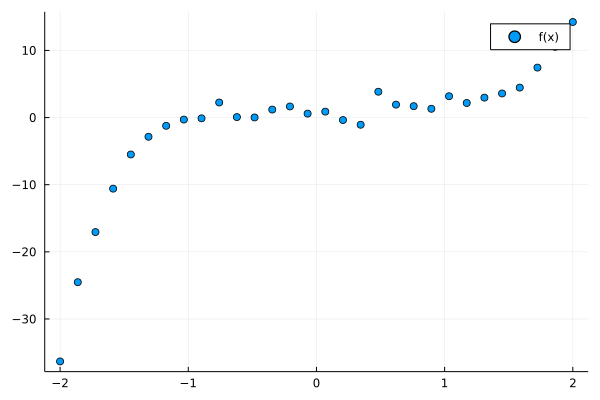

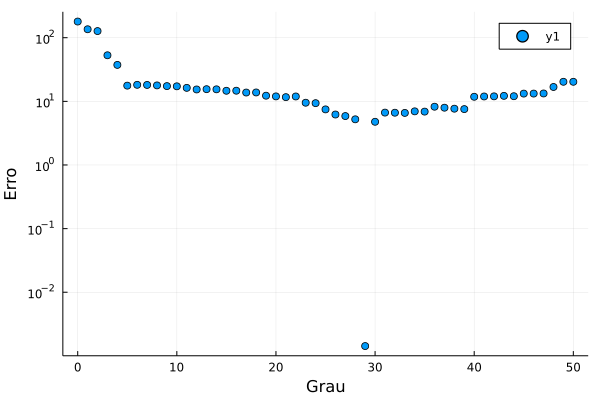

In [115]:
using Plots
using Random

# Gera os mesmos valores aleatórios em cada execução
Random.seed!(0)

# Polinômio de grau 5. 
# Os pontos serão gerados aleatoriamente aqui pela função randn
f(x) = x^5-x^4-x^3+x^2+x+1 + randn(1)[1]

# Domínio com trinta valores
xs = range(-2,2,length=30)

# Uma lista com os pontos (i,f(i)),...,(j,f(j)), estes pontos são tuplas.
pontos = map((x) -> (x, f(x)), xs)

# Desenha a função f(x) para os 30 pontos
display(scatter(pontos, label="f(x)"))

# Função que gera o polinômio aproximador e retorna o valor g(x) para um x dado
# coefs: Lista dos coeficientes computados
# x: Valor do contradomínio
function g(coefs, x)    
    y = 0
    # Computa y = c_0 + c_1x + c_2x^2 + ... + c_(n-1)x^(n-1)
    for i in 1:length(coefs)
        y = y + coefs[i]*x^(i-1)
    end
    return y
end

# Erros que serão calculados para cada grau.
Y = []
# Número de pontos
n_pontos = length(pontos)
# Grau limite que será computado
grau_lim = 50

# Computa o erro para cada polinômio de grau i.
for i in 0:grau_lim
    # Supomos que o erro é 0 no início
    erro = 0
    # Computa os coeficientes do polinîmio aproximador
    coefs = regressao(pontos,i)
    # Soma todos os erros, para cada ponto dado. Assim temos uma "visão" de todos os erros.
    for j in 1:n_pontos
        # Para cada x_j na lista de pontos...
        x = pontos[j][1]
        # ... Somamos o erro |polinomio_aproximador(x_j) - f(x_j)| a soma dos demais erros calculados nos outros valores do domínio.
        erro = erro + abs(g(coefs,x) - pontos[j][2])
    end
    
    # Colocamos o erro na lista dos erros calculados
    push!(Y,erro)
end

# Graus que serão calculados
X = 0:grau_lim
display(scatter(X,Y, xlabel="Grau", ylabel="Erro", yaxis=:log))

Podemos notar pelo gráfico em escala logarítmica no eixo y, que quando o grau é menor que 5, o erro é grande, como é de se esperar, porque utilizamos um polinômio de grau 5 para gerar os pontos. Do grau 5 ao 28, o erro diminui bastante, visto que queremos acertar pontos gerados por um polinômio de grau 5 com ruído através de um polinômio de grau maior ou igual a 5.

Quando o polinômio possui grau 29, o erro é praticamente 0, pois é o polinômio interpolador para estes 30 pontos. Quando o polinômio tem um grau maior que 29, o erro começa a aumentar novamente. Isso ocorre pois o sistema começa a ter bastante liberdade, já que há mais variáveis para serem determinadas do que equações para restringir o sistema. Como não há exatidão ao calcular os valores de tais variáveis, o erro começa a aumentar novamente.

## 1.3
A matriz $V$ e $y$ abaixo foram construídas através das esquações
$$
F_i - F_j = k_{ij}
$$
onde $F_i$ representa o número de alunos que preferem o filme $f_i$ ao invés do filme $f_j$. $F_j$ representa o número de alunos que preferem o filme $f_j$ ao invés do filme $f_i$. A parte esquerda dessas equações são representas pela matriz $V$, enquanto a parte direita pela matriz $y$. A matriz $p$ que queremos definir que representa a preferência dos alunos em relação a todos os filme é a matriz coluna
$$
\begin{bmatrix}
\text{TS}\\
\text{R}\\
\text{DVPF}\\
\text{CVA}\\
\text{OI}\\
\text{D}\\
\text{BB}\\
\text{HP}\\
\text{S}\\   
\end{bmatrix}
$$
onde cada sigla representa as inicias de cada nome de filme. O resultado você pode ver abaixo

In [6]:
V = [
    1 -1 0 0 0 0 0 0 0; 
    0 0 1 -1 0 0 0 0 0;
    0 0 0 0 1 -1 0 0 0;
    0 0 0 0 0 0 1 -1 0;
    0 0 0 0 0 -1 0 0 1;
    0 -1 0 0 0 0 0 1 0;
    1 0 -1 0 0 0 0 0 0;
    0 0 0 0 1 0 0 -1 0;
    0 0 0 1 0 -1 0 0 0;
    0 0 1 0 0 -1 0 0 0;
    0 -1 0 0 0 0 0 0 1;
    0 0 0 0 1 0 -1 0 0;
    1 0 0 0 0 0 -1 0 0;
    0 0 0 -1 1 0 0 0 0;
    ]
y = [11;3;7;2;9;7;5;5;2;2;11;5;3;7]

p = V\y
print(p)

LoadError: invalid redefinition of constant p

O resultado mostra que o melhor filme é Shrek, pois a variável $S$ possui o maior valor.

## 1.4

Como há muitos pontos, podemos tentar resolver o problema utilizando uma ideia mais geométrica. Para isso, os pesos foram colocados em uma lista, e os dias, em outra. A ideia é criar uma função discreta e desenhá-la, onde os pesos serão o contradomínio e os dias, o domínio da função. Os pesos são números reais, o que é bom para implementar, o problema está nos dias, que estão em formato de data. Para ultrapassar este obstáculo é possível tomar a primeiro dia da pesagem como o tempo $t=0$, enquanto os dias posteriores seriam uma sequência dos números naturais subsequentes 1,2,3,...,83. Os dias onde não houve pesagem, não são contados, então entre uma pesagem a outra pode haver um espaço no gráfico. Por exemplo, do dia 4 ao dia 10 não houve pesagem alguma, sendo assim há 6 dias onde não conhecemos a pesagem do professor. O resultado pode ser visto abaixo. 

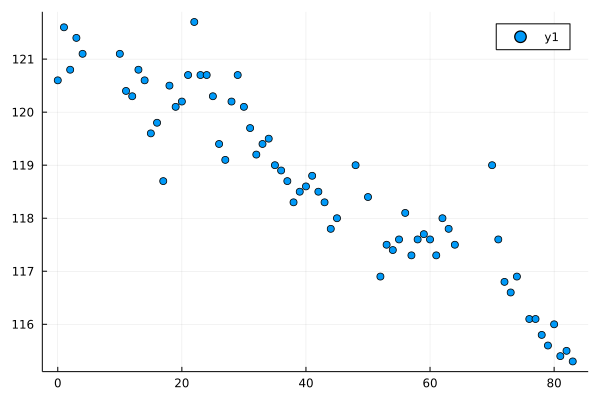

In [13]:
# Lista de pesos
pesos = [120.6, 121.6, 120.8, 121.4, 121.1, 121.1, 
    120.4, 120.3, 120.8, 120.6, 119.6, 119.8, 118.7, 
    120.5, 120.1, 120.2, 120.7, 121.7, 120.7, 120.7, 120.3, 
    119.4, 119.1, 120.2, 120.7, 120.1, 119.7, 119.2, 119.4, 
    119.5, 119.0, 118.9, 118.7, 118.3, 118.5, 118.6, 118.8, 
    118.5, 118.3, 117.8, 118.0, 119.0, 118.4, 116.9, 117.5, 
    117.4, 117.6, 118.1, 117.3, 117.6, 117.7, 117.6, 117.3, 
    118.0, 117.8, 117.5, 119.0, 117.6, 116.8, 116.6, 116.9, 
    116.1, 116.1, 115.8, 115.6, 116.0, 115.4, 115.5, 115.3
]

# Lista de dias
dias = [0, 1, 2, 3, 4, 10, 11, 12, 13, 14, 15, 16, 17, 18, 
    19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 
    33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 48,
    50, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 
    70, 71, 72, 73, 74, 76, 77, 78, 79, 80, 81, 82, 83
]

# Função  utilizada na função map.
# Rebece dois elementos x e y de duas listas xs e ys respectivamente e retorna a tupla (x,y)
function gera_pontos(x,y)
    return (x,y)
end
# Transforma a lista de pesos e dias em uma lista de pontos
pontos = map(gera_pontos, dias, pesos)

# Plota os pontos gerados
scatter(pontos)



Através do gráfico podemos notar que há uma certa linearidade. Alguns pontos estão bem próximos uns dos outros, alguns poucos, então mais distantes, mas mesmo assim, seguem uma linearidade, como se o peso decaísse de forma linear ao decorrer do tempo. A partir disso, podemos utilizar regressão, e tentar aproximar estes pontos através de uma função afim. A seguir, utilizaríamos o método de Newton para descobrir o tempo $t_0$ tal que $p(t_0) = 110$. 

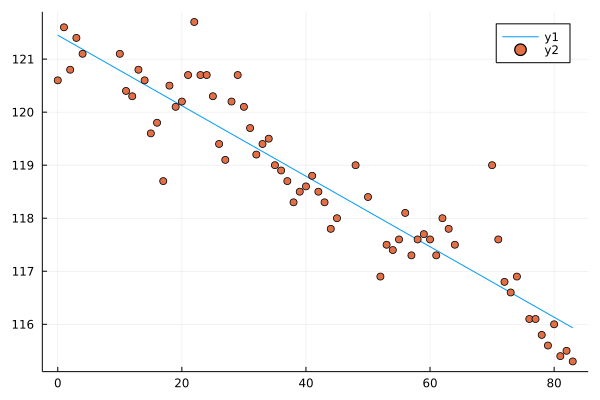

t_0 = 172.26753579630738


In [26]:
# Coeficientes da função afim computados
coefs = regressao(pontos,1)

# Função afim aproximadora gerada.
f(t) = coefs[1] + coefs[2]*t

# Derivada da função afim para utilizar no método de Newton.
f_linha(t) = coefs[2]

# Função que será utilizada pelo método de Newton, pois h(t_0) = 0 = f(t_0) - 100 => f(t_0) = 100
h(t) = f(t) - 110

# Derivada da função que será utilizada pelo método de Newton
h_linha(t) = f_linha(t)

# Domínio da função afim aproximadora. 
T = 0:83
# Desenho da função afim e dos pontos no mesmo gráfico para uma visualização geométrica.
plot(f,T)
display(scatter!(pontos))

#  Método de Newton computando t_0
t_0 = newton(83,h,h_linha,50)
println("t_0 = ", t_0)


Com o resultado acima podemos observar que apenas daqui a 89 dias depois da última pesagem o professor talvez tenha um peso igual a 110kg, visto que $t_0 - 83 = 172 - 83 = 89$. Este resultado é muito plausível pois na primeira pesagem, foi medido um peso de 120.6kg, enquanto no última, o peso era de 115.3kg. Fazendo a diferença podemos checar que no período dado o professor perdeu 5.3kg. Agora, fazendo a diferença da última pesagem com o peso de 110kg, ou seja, o peso alvo, percebemos que o professor precisa perder mais 5.3kg. Dessa forma, se a tendência de perca e ganho de massa continuar, podemos chutar que levará mais ou menos 83 dias para que o peso alvo seja alcançado. Contudo, pelo resultado do método de Newton através do polinômio aproximador, encontramos que daqui a mais ou menos 89 dias o professor chegará ao peso de 110kg. Portanto, tanto pelo método de checar a tendência das pesagens como pelo método da regressão, encontramos resultados bem próximos.

## 1.5

A tabela abaixo representa as medições feitas

| Tempo (h) | Temperatura (°C) |
| :-: | :-: |
| 15 | 34 | 
| 16.5 | 30 | 
| 17.5 | 25 | 

O número à direita depois da vírgula referencia os minutos. Assim, como 16:30h é o horario médio entre 16h e 17h, definimos o valor 16.5 como referência para o horário 16:30h, visto que 16.5 é o valor médio entre 16 e 17. Isso segue para a outra medida.
Pela Fórmula de Resfriamento de Newton
$$
T(t) = (T_0-T_f)e^{-kt} + T_f
$$
podemos dizer que $T_0 = 34$, pois foi a primeira medida feita e $T_f=20$, pois o corpo tende a se manter em equilíbrio térmico com o ambiente onde esta. Dessa forma, temos a fórmula
$$
T(t) = 14e^{-kt} + 20
$$
Além disso, tomamos que a primeira medida feita às 15h é o tempo $t = 0$. Com isso, a tabela com as devidas mundaças se torna

| t (h) | T (°C) |
| :-: | :-: |
| 0 | 34 | 
| 1.5 | 30 | 
| 2.5 | 25 | 

onde a coluna T mostra os valores da função $T$ em algum tempo $t$ dado. A meta é descobrir a constante $k$. Para isso, vamos utilizar regressão. Como $k$ não é um coeficiente linear, vamos operar a equação acima para que isso ocorra. Então
\begin{align*}
T(t) &= 14e^{-kt} + 20\\
T(t) - 20 &= 14e^{-kt}\\
\ln(T(t) - 20) &= \ln(14e^{-kt})\\
\ln(T(t) - 20) &= \ln(14) - kt
\end{align*}
Agora, através dos dados que possuímos, precisamos que a constante $k$ tente respeitar na medida do possível as equações
\begin{align*}
\ln(34 - 20) &= \ln(14) - 0k\\
\ln(30 - 20) &= \ln(14) - 1.5k\\
\ln(25 - 20) &= \ln(14) - 2.5k\\
\end{align*}
ou seja,
\begin{align*}
k = \frac{\ln\left(\frac{14}{10}\right)}{1.5}\\
k = \frac{\ln\left(\frac{14}{5}\right)}{2.5}
\end{align*}
pois a primeira equação não nos interessa, visto que a constante $k$ foi multiplicada por 0. Como não há um $k$ que respeite o sistema acima, utilizamos regressão. A matriz será
$$
\begin{bmatrix}
1\\
1
\end{bmatrix}
\begin{bmatrix}
k
\end{bmatrix}
=
\begin{bmatrix}
\frac{\ln\left(\frac{14}{10}\right)}{1.5}\\
\frac{\ln\left(\frac{14}{5}\right)}{2.5}
\end{bmatrix}
$$
O algoritmo abaixo computa o resultado

In [3]:
V = [1; 1;]
A = [ log(14/10)/1.5; log(14/5)/2.5;]

# Cômputo da regressão
k = V\A
print("k = ", k)

k = 0.3180812956433026

Com o valor de $k$ definido, a equação $T(t)$ se torna aproximadamente
$$
T(t) = 14e^{-0.31t} + 20
$$
Precisamos saber o tempo $t_0$ tal que $T(t_0) = 37$. Para isso, subtraímos 37 de $T(t)$ e utilizamos o método de Newton em sequência para descobrir a raiz. Então temos que
$$
T(t) = 14e^{-0.31t} - 17
$$
e para o método de Newton, 
$$
T'(t) = -4.34e^{-0.31t}
$$
O chute inicial será perto de $t=0$, ou seja, quando as medições começaram a serem feitas.

In [11]:
# Função temperetura
f(t) = 14*exp(-0.31t) - 17
# Derivada da função
f_linha(t) = -4.34*exp(-0.31t)

# Cômputo da raiz por Newton utilizando 20 passos
t_0 = newton(0,f,f_linha,20)
print("t_0 = ", t_0)

t_0 = -0.6263097240030892

Em muitos contextos, valores negativos para o tempo não fariam sentido, contudo, em nossa modelagem há lógica. Fazendo uma simples regra de três para saber qual minuto o valor $t_0$ referencia, pois $t_0 < 1$, encontramos que
\begin{align*}
\frac{30}{t} &= \frac{0.5}{0.62}\\
t &= 37.2
\end{align*}
ou seja, a pessoa morreu aproximadamente 37 minutos antes do tempo $t=0$. Portanto, o falecimento ocorreu próximo das 14:23h.

In [80]:
xs = range(-2,2,length=30)
pontos = map((x) -> (x, f(x) + randn(1)[1]), xs)

30-element Vector{Tuple{Float64, Float64}}:
 (-2.0, -37.06431122555696)
 (-1.8620689655172413, -25.44256762816945)
 (-1.7241379310344827, -17.5713741747665)
 (-1.5862068965517242, -10.686182666794643)
 (-1.4482758620689655, -6.063663457118869)
 (-1.3103448275862069, -3.2853370745999873)
 (-1.1724137931034482, -0.9625554546102189)
 (-1.0344827586206897, -1.1429118366506592)
 (-0.896551724137931, 0.3404304907263601)
 (-0.7586206896551724, -0.8144279188695094)
 (-0.6206896551724138, 3.148564604743325)
 (-0.4827586206896552, 1.160753914901374)
 (-0.3448275862068966, 0.7252632703065077)
 ⋮
 (0.4827586206896552, 3.5325153604668147)
 (0.6206896551724138, 2.906261248063472)
 (0.7586206896551724, 1.9512669384412038)
 (0.896551724137931, 1.6837386167645858)
 (1.0344827586206897, 1.9683205472398797)
 (1.1724137931034482, 2.7782906740732596)
 (1.3103448275862069, 2.9490355212157837)
 (1.4482758620689655, 4.042440752087411)
 (1.5862068965517242, 7.245650839227682)
 (1.7241379310344827, 6.0368287297

In [83]:
regressao(pontos,29)

30-element Vector{Float64}:
       1.5224289512882194
       0.20753176572480925
      30.655264074456632
     -33.60215227446936
    -728.7368937406486
     712.7270347713575
    5980.616319181918
   -2167.1800674991355
  -22328.709311425635
  -11720.235152380501
   43085.09676407583
   90960.82321879304
  -41721.414734857026
       ⋮
  -32143.484884196172
  295557.9357496162
   19406.77667727817
 -135283.56268691403
   -6916.118178534556
   41057.48550474417
    1480.302447474354
   -7912.741655632334
    -176.22063093131374
     875.3447769871144
       8.976298428009649
     -42.25900722041561

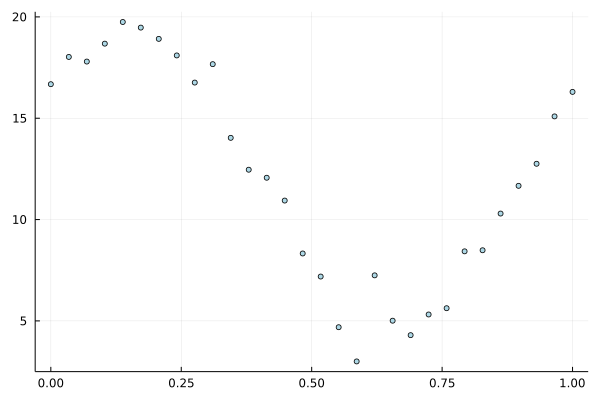

In [88]:
Random.seed!(0)
# Gerando dados fictícios para teste
n = 30
x = range(0, 1, length=n)

ϕ1(x) = sin(2π * x)
ϕ2(x) = cos(2π * x)
ϕ3(x) = 1.0

q = 6 * ϕ1.(x) + 4 * ϕ2.(x) + 12*ϕ3.(x) + randn(n)*1 #ruído
scatter(x, q, c=:lightblue, ms=3, leg=false)

In [101]:
Random.seed!(134)
x = randn(5)
q = randn(5)
println(x)
println(q)
println(randn(1)[1])
println(randn(1)[1])

[-0.69063693926301, -0.3904210172829403, -1.7148092875932321, 0.41912048635867066, 0.6213115106510283]
[-0.16913501701567402, 1.0651991715369296, -0.5603290996778998, -0.004258306385773898, -0.8713028100813351]
0.7417719734357816
0.49819079457261317
